# Caesarean dataset

# Perceptron

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = ""
filename = "caesarian.csv"
df = pd.read_csv(path+filename, header = None, skiprows = 17,
                 names = ['Age','Delivery number','Delivery time','Blood pressure', 'Heart problem', 'Caesarian'])
#cleaning of data
df.drop(["Delivery number","Delivery time"], axis = 1, inplace = True)
df.info()
data = np.asmatrix(df, dtype = 'float64')
#inputs and targets
features= data[:, :-1]
labels=data[:, -1]

#perceptron model
weight=np.zeros(shape=(1, features.shape[1]+1))
error_=[]
for epoch in range(20):
    error=0
    for x, label in zip(features, labels):
        x=np.insert(x,0,1)
        y=np.dot(weight, x.transpose())
        target=1.0 if(y>0) else 0.0
        delta=(label.item(0,0)-target)
        
        if(delta):
            error+=1
            weight+=(delta*x)
    error_.append(error)
print(error)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
Age               80 non-null int64
Blood pressure    80 non-null int64
Heart problem     80 non-null int64
Caesarian         80 non-null int64
dtypes: int64(4)
memory usage: 2.6 KB
45


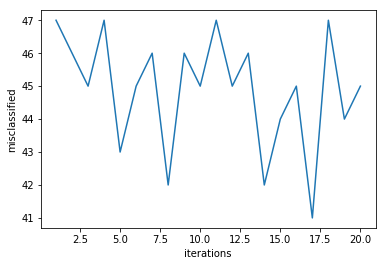

In [91]:
#plotting
epochs = np.arange(1, 20+1)
plt.plot(epochs, error_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [132]:
#for making dataset homogeneous, because age is disturbing our datasets.
#using library
from sklearn import preprocessing
X1 = preprocessing.normalize(features)
print(X1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, labels, test_size=0.25, random_state=0)

[[0.99589321 0.09053575 0.        ]
 [0.99926117 0.03843312 0.        ]
 [0.99926117 0.03843312 0.        ]
 [0.9974587  0.07124705 0.        ]
 [0.99896854 0.04540766 0.        ]
 [1.         0.         0.        ]
 [0.99931483 0.03701166 0.        ]
 [0.99951208 0.03123475 0.        ]
 [0.99936285 0.03569153 0.        ]
 [0.99931483 0.03701166 0.        ]
 [0.99961442 0.02776707 0.        ]
 [1.         0.         0.        ]
 [0.99905616 0.04343722 0.        ]
 [0.99750934 0.04987547 0.04987547]
 [0.999406   0.         0.03446228]
 [1.         0.         0.        ]
 [0.99920096 0.03996804 0.        ]
 [0.99503719 0.09950372 0.        ]
 [0.99927034 0.02700731 0.02700731]
 [0.99913307 0.         0.04163054]
 [0.99926117 0.03843312 0.        ]
 [0.99954118 0.         0.03028913]
 [0.99681528 0.07974522 0.        ]
 [0.99931483 0.         0.03701166]
 [0.99380799 0.0993808  0.0496904 ]
 [0.99846035 0.05547002 0.        ]
 [0.99237212 0.11026357 0.05513178]
 [0.99944491 0.03331483 0.  

In [117]:
from sklearn.linear_model import Perceptron
from sklearn import metrics
clf = Perceptron(n_iter=20, random_state=42)
clf.fit(X_train,Y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(Y_test,predict)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50.0

# SVM

In [116]:
from sklearn import svm
svc=svm.SVC()
svc.fit(X_train,Y_train)
predict=svc.predict(X_test)
metrics.accuracy_score(Y_test,predict)*100




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50.0

# SOM (Self organizing map)

In [174]:
w=np.array([[0.8, 0.6],[0.1, 0.6],[0.4, 0.7]])

In [175]:
lrate=0.3
e=1
d=[0,0]
print('learning rate of this epoch is',lrate)
while(e<=3):
    print('epoch is',e)
    for i in range(79):
        for j in range(2):
            temp=0
            for k in range(3):
                temp=temp+((w[k,j]-X1[i,k])**2)
            d[j]=temp
        if(d[0]<d[1]):
            j=0
        else:
            j=1
        print('winning unit is',j+1)
        print('weight updation...')
        for m in range(3):
            w[m,j]=w[m,j]+(lrate*(X1[i,m]-w[m,j]))
        #print('updated weight',w)
        
    e=e+1
    lrate=0.5*lrate
    print('updated learnin grate after ',e,'epoch is',lrate)

learning rate of this epoch is 0.3
epoch is 1
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight upda

# LVQ

In [166]:
w=np.array([[0.29, 0.64],[0.57, 0.23],[0.48, 0.77]])

In [169]:
lrate=0.1
e=1
d=[0,0]
print('learning rate of this epoch is',lrate)
while(e<=5):
    print('epoch is',e)
    for i in range(5):
        for j in range(2):
            temp=0
            for k in range(3):
                temp=temp+((w[k,j]-X1[i,k])**2)
            d[j]=temp
        if(d[0]<d[1]):
            j=0
        else:
            j=1
        print('winning unit is',j+1)
        print('weight updation...')
        if j==labels[i]:
            for m in range(3):
                w[m,j]=w[m,j]+(lrate*(X1[i,m]-w[m,j]))
        else:
            for m in range(3):
                w[m,j]=w[m,j]-(lrate*(X1[i,m]-w[m,j]))
        #print('updated weight',w)
        
    e=e+1
    lrate=0.5*lrate
    print('updated learnin grate after ',e,'epoch is',lrate)

learning rate of this epoch is 0.1
epoch is 1
winning unit is 2
weight updation...
winning unit is 1
weight updation...
winning unit is 2
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
updated learnin grate after  2 epoch is 0.05
epoch is 2
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
updated learnin grate after  3 epoch is 0.025
epoch is 3
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
updated learnin grate after  4 epoch is 0.0125
epoch is 4
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
winning unit is 1
weight updation...
updated learnin grate after  5 epoch is 0.0

# THANK YOU